## Importing the Required Libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# # Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Getting the Data Sets

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Exploratory Data Analysis

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# We have 11 features and one target variable (survived) in the train data

# 5 of the features are int64 type, 5 are object types and 2 of them are float64 types.

# The data description is as under:

'''
01. PassengerId: Unique ID of each passenger
02. Survived:    Survived passengers (Target variable)
03. Pclass:      Ticket class for each passenger
04. Name:        Names of passengers
05: Sex:         Sex
06. Age:         Age of each passenger in years
07. SibSp:       No of siblings and spouses abroad the titanic
08. Parch:       No of parents and childern abroad the titanic
09. Ticket:      Ticket number of each passenger
10. Fare:        Each passenger Fare
11. Cabin:       Cabin No. of each passenger
12. Embarked:    Port of Embarkation for each passenger
'''
train_data.shape

(891, 12)

In [5]:
train_data.describe().transpose()

# on average 38% passengers survived as per the training dataset.

# The age columns has some missing values and ranges from 0.4 to 80

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
# We will need to deal with the string values to get it process through Ml algorithms

# We will deal with the missing values (NaN) of other attributes as well

# The features are widely spreaded over different ranges, We will try to convert them into roughly same scale

train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# finding the missing values for train and test data

def missing_data(train_data, test_data):
    Train_total = train_data.isnull().sum().sort_values(ascending = False)
    Train_perc = (train_data.isnull().sum()/train_data.shape[0] * 100).sort_values(ascending = False)
    
    Test_total = test_data.isnull().sum().sort_values(ascending = False)
    Test_perc = (test_data.isnull().sum()/test_data.shape[0] * 100).sort_values(ascending = False)
    
    return pd.concat([Train_total,Train_perc, Test_total, Test_perc] , axis = 1 , 
                     keys = ['Train_Total_Mssing' , 'Train_Perc', 'Test_Total_Missing', 'Test_perc' ])

missing_data(train_data, test_data)

# the cabin feature has 77% and 78% missing values which we might drop from the data set.

# the missing values of age and embarked and fare can be dealt with

,Train_Total_Mssing,Train_Perc,Test_Total_Missing,Test_perc
Cabin,687,77.104377,327.0,78.229665
Age,177,19.865320,86.0,20.574163
Embarked,2,0.224467,0.0,0.000000
PassengerId,0,0.000000,0.0,0.000000
Survived,0,0.000000,NaN,NaN
Pclass,0,0.000000,0.0,0.000000
Name,0,0.000000,0.0,0.000000
Sex,0,0.000000,0.0,0.000000
SibSp,0,0.000000,0.0,0.000000
Parch,0,0.000000,0.0,0.000000


<function matplotlib.pyplot.show(close=None, block=None)>

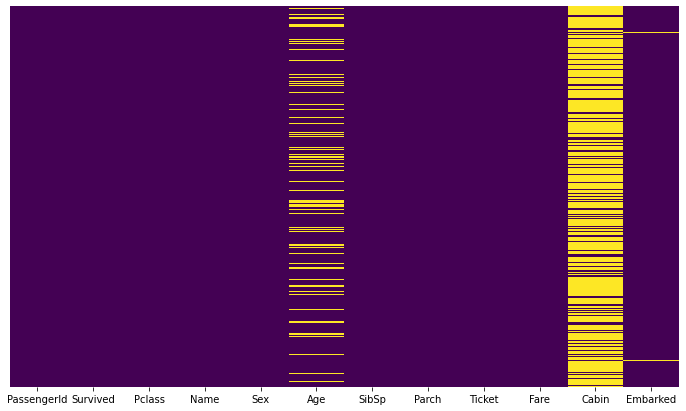

In [8]:
# Showing missing values through heatmap

plt.figure(figsize = (12,7))

sns.heatmap(train_data.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')
plt.show

## Corelation among the attributes

In [9]:
cor_matrix = train_data.corr()
cor_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

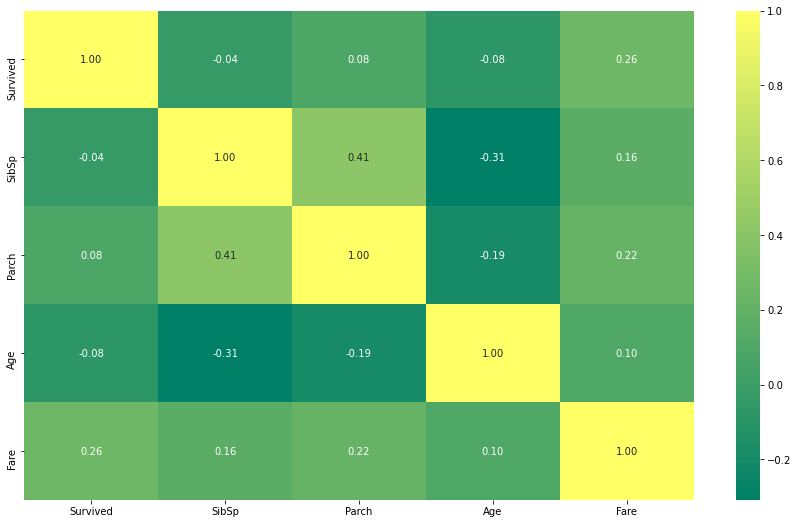

In [10]:
plt.figure(figsize = (15, 9))

corr_numeric = sns.heatmap(train_data[["Survived","SibSp","Parch","Age","Fare"]].corr(),
                           annot=True, fmt = ".2f", cmap = "summer")


### Age

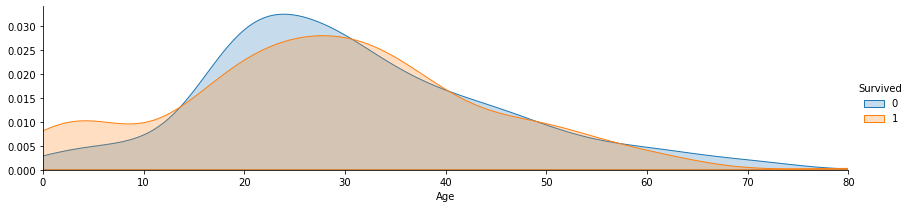

In [11]:
fig = sns.FacetGrid(train_data, hue = 'Survived', aspect = 4)

fig.map(sns.kdeplot, 'Age' , shade = True)
fig.set(xlim = (0, train_data['Age'].max()))
fig.add_legend()

### Age and Sex

Text(0.5, 1.0, 'Male')

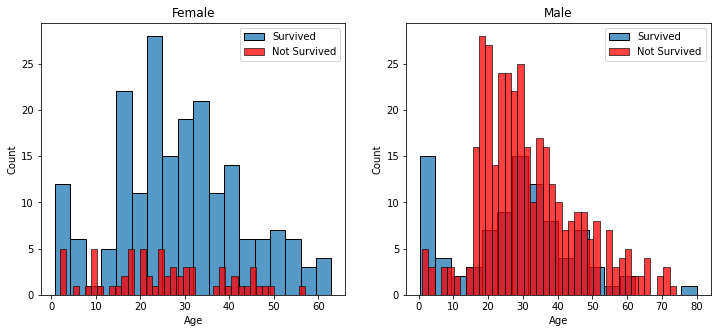

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 5))

women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']

women_data = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'Survived', ax = axes[0], kde =False)
women_data = sns.histplot(women[women['Survived']==0].Age.dropna(), color='r', bins=40, label = 'Not Survived', ax = axes[0], kde =False)
women_data.legend()
women_data.set_title('Female')

men_data = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'Survived', ax = axes[1], kde =False)
men_data = sns.histplot(men[men['Survived']==0].Age.dropna(), color='r', bins=40, label = 'Not Survived', ax = axes[1], kde =False)
men_data.legend()
men_data.set_title('Male')

### Pclass

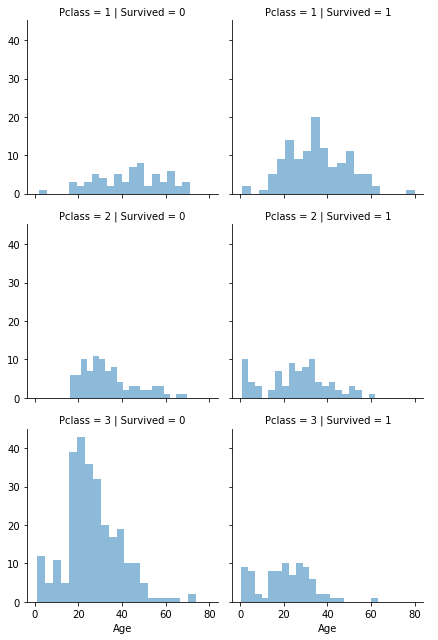

In [13]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### SibSp

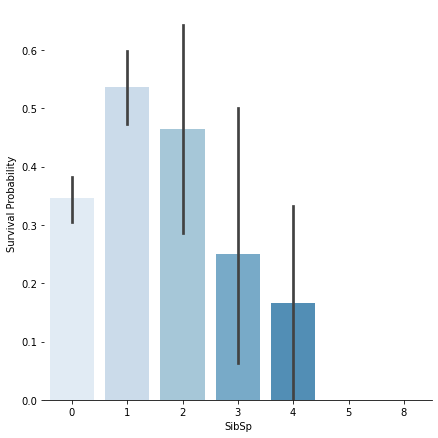

In [14]:
SibSp_Sur = sns.catplot(x = "SibSp", y = "Survived", data=train_data,
                   kind="bar", height = 6 , palette = "Blues")

SibSp_Sur.despine(left=True)
SibSp_Sur = SibSp_Sur.set_ylabels("Survival Probability")

### Parch

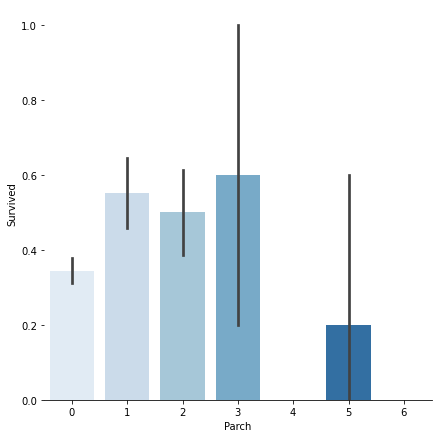

In [15]:
Parch_Sur = sns.catplot(x = "Parch", y = "Survived", data = train_data,
                   kind="bar", height = 6 , palette = "Blues")

Parch_Sur.despine(left=True)
Parch_Sur = SibSp_Sur.set_ylabels("Survival Probability")

## Missing Values

### Age

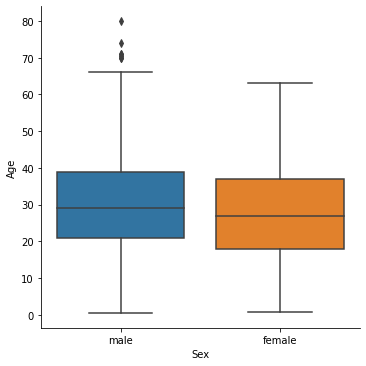

In [16]:
age_sex = sns.catplot(y="Age", x="Sex", data = train_data, kind="box")

# age distribution is almost for both male and female so we cannot predict age from here

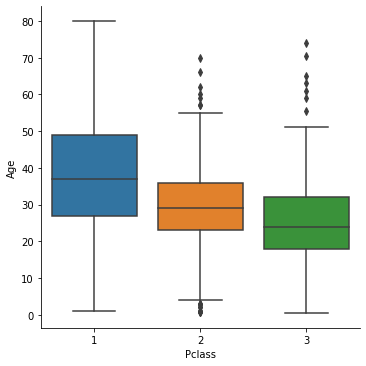

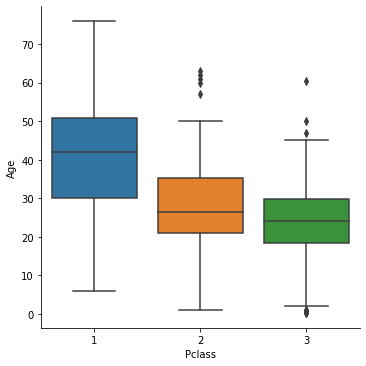

In [17]:
pclass_age_train = sns.catplot(x="Pclass", y="Age", data = train_data, kind="box")

pclass_age_test = sns.catplot(x="Pclass", y="Age", data = test_data, kind="box")

# we can see that age is differently distributed in all of the three classes

# 37, 29 and 24 can be seen the median values for class 1, 2 and 3 respectively

# we can use the median values of each class to fill the missing age values

In [18]:
# concating the datasets, it will be used in upcoming steps

# function for age imputation


def AgeImpute(data):
    Age = data[0]
    Pclass = data[1]
    
    if pd.isnull(Age):
        if Pclass == 1: return 37
        elif Pclass == 2: return 29
        else: return 24
    else:
        return Age

# Age Impute
train_data['Age'] = train_data[['Age' , 'Pclass']].apply(AgeImpute, axis = 1)
test_data['Age'] = test_data[['Age' , 'Pclass']].apply(AgeImpute, axis = 1)

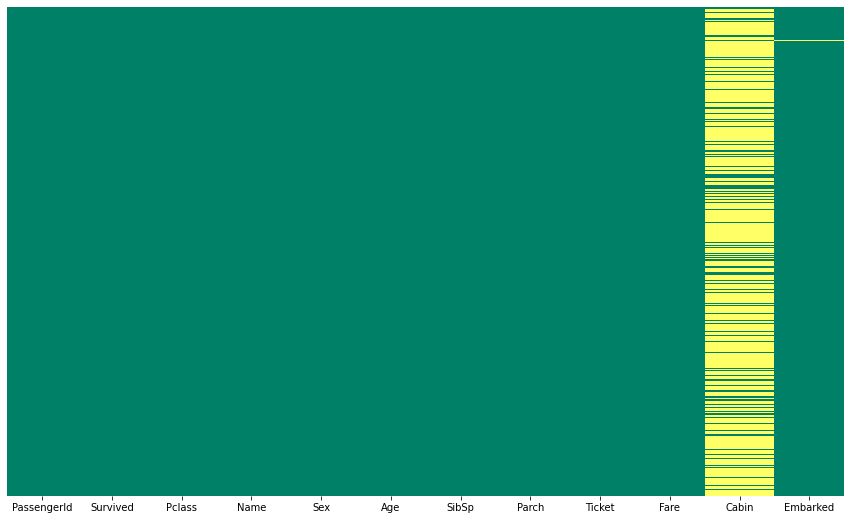

In [19]:
# showing imputed age values through heatmap

plt.figure(figsize = (15, 9))
age_heatmap = sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False, cmap = 'summer')

plt.show()

### Embarked

In [20]:
# embarked has three values so first we will check the distribution of those values

# we have 2 values missing of embarked in the train data

print(train_data.groupby(['Embarked'])['PassengerId'].count())

# we will fill the missing values with the most frequent occuring value which is "S"

# print(dataset["Embarked"].isnull().sum())

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64


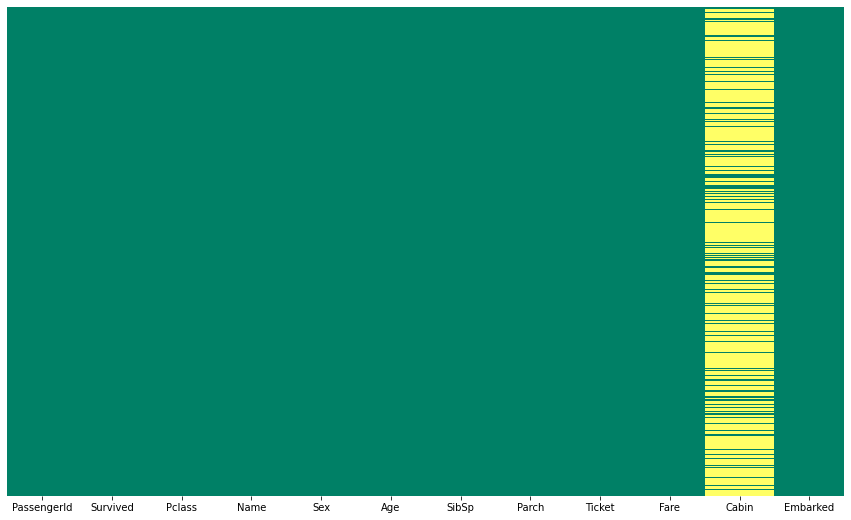

In [21]:
# Filling the missing embarked values

train_data['Embarked'] = train_data["Embarked"].fillna('S')

# Showing the filled values through heatmap

plt.figure(figsize = (15, 9))
sns.heatmap(train_data.isnull(), yticklabels = False, 
            cbar = False, cmap = 'summer')

plt.show()

### Fare

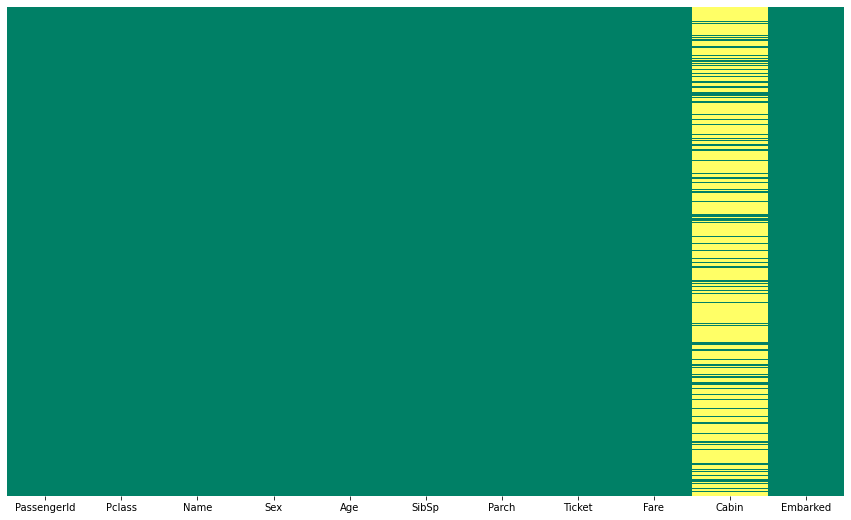

In [22]:
# Filling the missing value of Fare

# we have 1 missing value of fare in the test data

test_data['Fare'] = test_data["Fare"].fillna(test_data['Fare'].mean())
    

# Showing the filled values through heatmap

plt.figure(figsize = (15, 9))
sns.heatmap(test_data.isnull(), yticklabels = False, 
            cbar = False, cmap = 'summer')

plt.show()


### Cabin

In [23]:
# we will remove the cabin column as it has 77% and 78% missing values in the train and test data

train_final = train_data.drop(columns= 'Cabin', axis = 1)

test_final = test_data.drop(columns= 'Cabin', axis = 1)

def missing_data(train_final, test_final):
    Train_total = train_final.isnull().sum().sort_values(ascending = False)
    Train_perc = (train_final.isnull().sum()/train_final.shape[0] * 100).sort_values(ascending = False)
    
    Test_total = test_final.isnull().sum().sort_values(ascending = False)
    Test_perc = (test_final.isnull().sum()/test_final.shape[0] * 100).sort_values(ascending = False)
    
    return pd.concat([Train_total,Train_perc, Test_total, Test_perc] , axis = 1 , 
                     keys = ['Train_Total_Mssing' , 'Train_Perc', 'Test_Total_Missing', 'Test_perc' ])

missing_data(train_final, test_final)

# Our train and Test Datasets are cleaned from missing values

,Train_Total_Mssing,Train_Perc,Test_Total_Missing,Test_perc
PassengerId,0,0.0,0.0,0.0
Survived,0,0.0,NaN,NaN
Pclass,0,0.0,0.0,0.0
Name,0,0.0,0.0,0.0
Sex,0,0.0,0.0,0.0
Age,0,0.0,0.0,0.0
SibSp,0,0.0,0.0,0.0
Parch,0,0.0,0.0,0.0
Ticket,0,0.0,0.0,0.0
Fare,0,0.0,0.0,0.0


## Converting the Datatypes

In [24]:
dataset = pd.concat([train_final, test_final], axis=0)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


### Fare

In [25]:
# Converting the datatype of fare

train_final['Fare'] = train_final['Fare'].astype(float)
test_final['Fare'] = test_final['Fare'].astype(float)

### Sex

In [26]:
train_sex = pd.get_dummies(train_final["Sex"], drop_first=True)


test_sex = pd.get_dummies(test_final["Sex"], drop_first=True)

### Embarked

In [27]:
train_embarked = pd.get_dummies(train_final["Embarked"], drop_first=True)

test_embarked = pd.get_dummies(test_final["Embarked"], drop_first=True)

### Pclass

In [28]:
train_pclass = pd.get_dummies(train_final["Pclass"], drop_first=True)


test_pclass = pd.get_dummies(test_final["Pclass"], drop_first=True)

### Family Size

In [29]:
train_final['Famsize']= train_final['SibSp']* train_final['Parch'] + 1

test_final['Famsize']= test_final['SibSp']* test_final['Parch'] + 1

In [30]:
# Concatenating the new made features with the original train and test data

train_dataset = pd.concat([train_final, train_sex, train_embarked, train_pclass], axis=1)
# train_dataset.head(10)

test_dataset = pd.concat([test_final, test_sex, test_embarked, test_pclass], axis=1)

In [31]:
# changing the type of new features from uint8

train_dataset['male'] = train_dataset['male'].astype('int64')
test_dataset['male'] = test_dataset['male'].astype('int64')

train_dataset['Q'] = train_dataset['Q'].astype('int64')
test_dataset['Q'] = test_dataset['Q'].astype('int64')

train_dataset['S'] = train_dataset['S'].astype('int64')
test_dataset['S'] = test_dataset['S'].astype('int64')

train_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Famsize      891 non-null    int64  
 12  male         891 non-null    int64  
 13  Q            891 non-null    int64  
 14  S            891 non-null    int64  
 15  2            891 non-null    uint8  
 16  3            891 non-null    uint8  
dtypes: float64(2), int64(9), object(4), uint8(2)
memory usage: 106.3+ KB


In [32]:
# Grouping Age and Fare to break down the distribution of large values

data = [train_dataset, test_dataset]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

data = [train_dataset, test_dataset]

for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)


### Age times Pclass

In [33]:
train_dataset['Age_Class']= train_dataset['Age']* train_dataset['Pclass']

test_dataset['Age_Class']= test_dataset['Age']* test_dataset['Pclass']

In [34]:
# droping the unwanted columns from train and test data

final_train_data = train_dataset.drop(columns = ['PassengerId','Pclass','Name', 'Sex', 'Ticket', 'Embarked'])

final_test_data = test_dataset.drop(columns = ['Pclass','Name', 'Sex', 'Ticket', 'Embarked'])

## Buidling the Model

In [35]:
X_train = final_train_data.drop("Survived", axis=1)
Y_train = final_train_data["Survived"]
X_test  = final_test_data.drop("PassengerId", axis=1).copy()

### Random Forest

In [36]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

### Logistic Regression

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

### Gaussian Naive Bayes

In [38]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train) 

Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

### K Nearest Neighbor

In [39]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

### Stochastic Gradient Descent

In [40]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

### Decision Tree

In [41]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

### Perceptron

In [42]:
perceptron = Perceptron(max_iter=50)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

### Results

In [43]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
90.35,Random Forest
90.35,Decision Tree
85.97,KNN
81.26,Logistic Regression
75.76,Stochastic Gradient Decent
72.95,Naive Bayes
67.68,Perceptron


## Confusion Matrix

In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

# 1st row, 1st column; correctly classified as not survived (true negative)

# 1st row, 2nd column; wrongly classified as not survived (false positive)

# 2nd row, 1st column; wrongly classified as survived (false negative)

# 2nd row, 2nd column; correctly classified as survived (true positive)

array([[473,  76],
       [102, 240]], dtype=int64)

## Precision and Recall

In [45]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.759493670886076
Recall: 0.7017543859649122


## F1 Score

In [46]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.729483282674772